In [1]:
import numpy as np
import pandas as pd
import os
import re
from scipy import ndimage, misc
from skimage.transform import resize, rescale
from matplotlib import pyplot
import matplotlib.pyplot as plt
from keras.preprocessing import image
from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.layers import Conv2DTranspose, UpSampling2D, add
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras import regularizers
import tensorflow as tf
print(tf.__version__)

2.3.0


In [2]:
import cv2
import glob
from tqdm import tqdm

In [ ]:
img_input = Input(shape=(256,256,3))

In [ ]:
encoder_layer1 = Conv2D(64,(3,3), padding='same', activation='relu', activity_regularizer=regularizers.l1(10e-10))(img_input)

In [ ]:
encoder_layer2 = Conv2D(64,(3,3), padding='same', activation='relu', activity_regularizer=regularizers.l1(10e-10))(encoder_layer1)

In [ ]:
encoder_layer3 = MaxPooling2D(padding='same')(encoder_layer2)

In [ ]:
encoder_layer4 = Conv2D(128, (3,3), padding='same', activation='relu', activity_regularizer=regularizers.l1(10e-10))(encoder_layer3)

In [ ]:
encoder_layer5 = Conv2D(128, (3,3), padding='same', activation='relu', activity_regularizer=regularizers.l1(10e-10))(encoder_layer4)

In [ ]:
encoder_layer6 = MaxPooling2D(padding='same')(encoder_layer5)

In [ ]:
encoder_layer7 =  Conv2D(256, (3,3), padding='same', activation='relu', activity_regularizer=regularizers.l1(10e-10))(encoder_layer6)

In [ ]:
encoder_model = Model(img_input, encoder_layer7)

In [ ]:
encoder_model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 256, 256, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 128)      

In [ ]:
img_input = Input(shape=(256,256,3))
encoder_layer1 = Conv2D(64,(3,3), padding='same', activation='relu', activity_regularizer=regularizers.l1(10e-10))(img_input)
encoder_layer2 = Conv2D(64,(3,3), padding='same', activation='relu', activity_regularizer=regularizers.l1(10e-10))(encoder_layer1)
encoder_layer3 = MaxPooling2D(padding='same')(encoder_layer2)
encoder_layer4 = Conv2D(128, (3,3), padding='same', activation='relu', activity_regularizer=regularizers.l1(10e-10))(encoder_layer3)
encoder_layer5 = Conv2D(128, (3,3), padding='same', activation='relu', activity_regularizer=regularizers.l1(10e-10))(encoder_layer4)
encoder_layer6 = MaxPooling2D(padding='same')(encoder_layer5)
encoder_layer7 =  Conv2D(256, (3,3), padding='same', activation='relu', activity_regularizer=regularizers.l1(10e-10))(encoder_layer6)




In [ ]:
layer8 = UpSampling2D()(encoder_layer7)
layer9 = Conv2D(128, (3,3), padding='same', activation='relu', activity_regularizer=regularizers.l1(10e-10))(layer8)
layer10 = Conv2D(128, (3,3), padding='same', activation='relu', activity_regularizer=regularizers.l1(10e-10))(layer9)
layer11 = add([encoder_layer5, layer10]) # send the image data encoder to decoder, easy to learn, vanishing gradient problem
layer12 = UpSampling2D()(layer11)
layer13 = Conv2D(64, (3,3), padding='same', activation='relu', activity_regularizer=regularizers.l1(10e-10))(layer12)
layer14 = Conv2D(64, (3,3), padding='same', activation='relu', activity_regularizer=regularizers.l1(10e-10))(layer13)
layer15 = add([layer14, encoder_layer2])
layer16 = Conv2D(3, (3,3), padding='same', activation='relu', activity_regularizer=regularizers.l1(10e-10))(layer15)

autoencoder = Model(img_input , layer16)

In [ ]:
autoencoder.summary()

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d_20 (Conv2D)              (None, 256, 256, 64) 1792        input_4[0][0]                    
__________________________________________________________________________________________________
conv2d_21 (Conv2D)              (None, 256, 256, 64) 36928       conv2d_20[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_4 (MaxPooling2D)  (None, 128, 128, 64) 0           conv2d_21[0][0]                  
_______________________________________________________________________________________

In [ ]:
autoencoder.compile(optimizer='adadelta', loss='mean_squared_error')

In [ ]:
! wget http://vis-www.cs.umass.edu/lfw/lfw.tgz


--2020-09-01 05:30:39--  http://vis-www.cs.umass.edu/lfw/lfw.tgz
Resolving vis-www.cs.umass.edu (vis-www.cs.umass.edu)... 128.119.244.95
Connecting to vis-www.cs.umass.edu (vis-www.cs.umass.edu)|128.119.244.95|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 180566744 (172M) [application/x-gzip]
Saving to: ‘lfw.tgz.3’

lfw.tgz.3           100%[===================>] 172.20M  30.7MB/s    in 7.4s    

2020-09-01 05:30:47 (23.3 MB/s) - ‘lfw.tgz.3’ saved [180566744/180566744]



In [ ]:
! tar -xvzf lfw.tgz


Streaming output truncated to the last 5000 lines.
lfw/Luis_Sanchez/Luis_Sanchez_0001.jpg
lfw/Juliette_Binoche/
lfw/Juliette_Binoche/Juliette_Binoche_0001.jpg
lfw/Joel_Todd/
lfw/Joel_Todd/Joel_Todd_0001.jpg
lfw/Allan_Wagner/
lfw/Allan_Wagner/Allan_Wagner_0001.jpg
lfw/Alejandro_Fernandez/
lfw/Alejandro_Fernandez/Alejandro_Fernandez_0001.jpg
lfw/Guillaume_Depardieu/
lfw/Guillaume_Depardieu/Guillaume_Depardieu_0001.jpg
lfw/Delphine_Chuillot/
lfw/Delphine_Chuillot/Delphine_Chuillot_0001.jpg
lfw/Paul_LeClerc/
lfw/Paul_LeClerc/Paul_LeClerc_0001.jpg
lfw/Eddie_Jordan/
lfw/Eddie_Jordan/Eddie_Jordan_0001.jpg
lfw/Lionel_Richie/
lfw/Lionel_Richie/Lionel_Richie_0001.jpg
lfw/Lionel_Richie/Lionel_Richie_0002.jpg
lfw/Jose_Viegas_Filho/
lfw/Jose_Viegas_Filho/Jose_Viegas_Filho_0001.jpg
lfw/Jose_Viegas_Filho/Jose_Viegas_Filho_0002.jpg
lfw/Roger_Mahony/
lfw/Roger_Mahony/Roger_Mahony_0001.jpg
lfw/Clay_Aiken/
lfw/Clay_Aiken/Clay_Aiken_0001.jpg
lfw/Clay_Aiken/Clay_Aiken_0002.jpg
lfw/Clay_Aiken/Clay_Aiken_000

In [ ]:
face_images = glob.glob('lfw/**/*.jpg')


In [ ]:
face = glob.glob('lfw/**/*')

In [ ]:
len(face)

13233

In [ ]:
face[0]

'lfw/Steve_Phillips/Steve_Phillips_0001.jpg'

In [ ]:
len(face_images)

13233

In [ ]:
face_images = face_images[0:5000]

In [ ]:
face_images[0]

'lfw/Steve_Phillips/Steve_Phillips_0001.jpg'

In [ ]:
len(face_images)

5000

In [ ]:
list_images = []

for i in tqdm(face_images):
  img = image.load_img(i, target_size=(256,256,3))
  img = image.img_to_array(img)
  img = img/255.
  list_images.append(img)

100%|██████████| 5000/5000 [00:09<00:00, 500.13it/s]


In [ ]:

list_images = np.array(list_images)

# split data into train and validation data
train_x, val_x = train_test_split(list_images, random_state=42, test_size=0.1)

In [ ]:
def pixalate_image(image, scale_percent = 40):
  width = int(image.shape[1] * scale_percent / 100)
  height = int(image.shape[0] * scale_percent / 100)
  dim = (width, height)

  low_res_image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
  '''
  # scale back to original size
  width = int(small_image.shape[1] * 100 / scale_percent)
  height = int(small_image.shape[0] * 100 / scale_percent)
  dim = (width, height)
  
  low_res_image = cv2.resize(small_image, dim, interpolation = cv2.INTER_AREA)
  '''
  return low_res_image

In [ ]:
train_x_px = []

for i in range(train_x.shape[0]):
  temp = pixalate_image(train_x[i,:,:,:])
  train_x_px.append(temp)

train_x_px = np.array(train_x_px)


# get low resolution images for the validation set
val_x_px = []

for i in range(val_x.shape[0]):
  temp = pixalate_image(val_x[i,:,:,:])
  val_x_px.append(temp)

val_x_px = np.array(val_x_px)

In [ ]:

early_stopper = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=4, verbose=1, mode='auto')

a_e = autoencoder.fit(train_x_px, train_x,
            epochs=8,
            batch_size=128,
            shuffle=True,
            validation_data=(val_x_px, val_x),
            callbacks=[early_stopper])

In [ ]:
predictions = autoencoder.predict(val_x_px)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


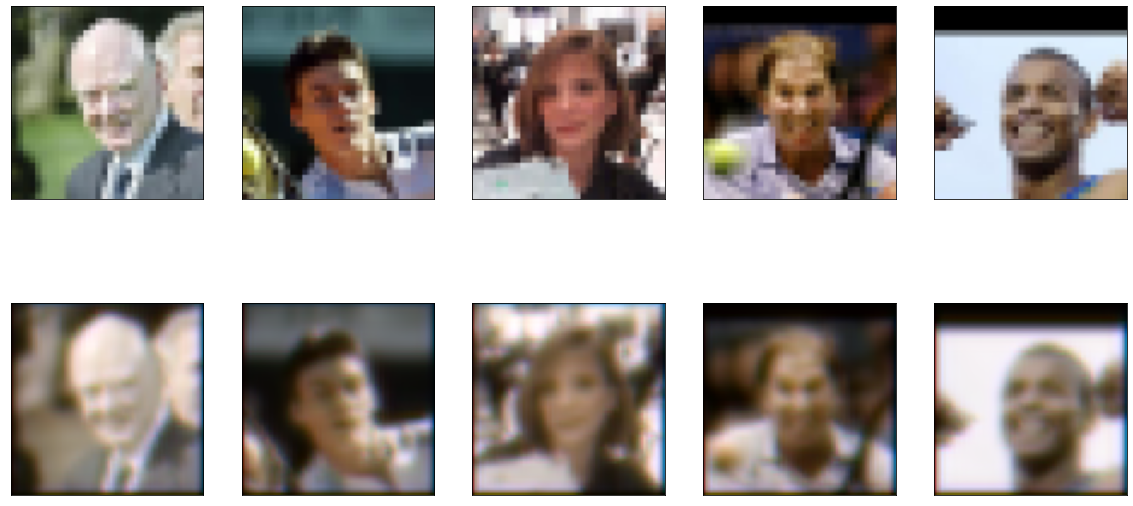

In [ ]:
n = 5
plt.figure(figsize= (20,10))

for i in range(n):
  ax = plt.subplot(2, n, i+1)
  plt.imshow(val_x_px[i+20])
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(2, n, i+1+n)
  plt.imshow(predictions[i+20])
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()

In [ ]:
myimage = image.load_img("/content/drive/My Drive/planet_image.jpg", target_size=(80,80,3))

In [ ]:
x=image.img_to_array(myimage)

In [ ]:
x = x.reshape((1,80,80,3))

In [ ]:
x= np.expand_dims(x, axis=0)

In [ ]:
x.shape

(1, 80, 80, 3)

In [ ]:
from keras.applications.vgg16 import preprocess_input

img_data = preprocess_input(x)

In [ ]:
img_data.shape

(1, 80, 80, 3)

In [ ]:
val_x_px.shape

(1324, 80, 80, 3)

In [ ]:
predictx = autoencoder.predict(img_data)

In [ ]:
predictx.shape

(1, 80, 80, 3)

In [ ]:
predictions.shape

(1324, 80, 80, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


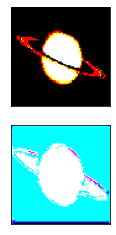

In [ ]:
ax = plt.subplot(2, 1,1)
plt.imshow(img_data[0])
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

ax = plt.subplot(2, 1,2)
plt.imshow(predictx[0])
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

In [ ]:
import os
import re
from scipy import ndimage, misc
from skimage.transform import resize, rescale
from matplotlib import pyplot
import numpy as np

def train_batches(just_load_dataset=False):

    batches = 256 # Number of images to have at the same time in a batch

    batch = 0 # Number if images in the current batch (grows over time and then resets for each batch)
    batch_nb = 0 # Batch current index

    max_batches = -1 # If you want to train only on a limited number of images to finish the training even faster.
    
    ep = 4 # Number of epochs

    images = []
    x_train_n = []
    x_train_down = []
    
    x_train_n2 = [] # Resulting high res dataset
    x_train_down2 = [] # Resulting low res dataset
    
    for root, dirnames, filenames in os.walk("/content/drive/My Drive/cars_dataset_for_super_resolution/"):
        for filename in filenames:
            if re.search("\.(jpg|jpeg|JPEG|png|bmp|tiff)$", filename):
                if batch_nb == max_batches: # If we limit the number of batches, just return earlier
                    return x_train_n2, x_train_down2
                filepath = os.path.join(root, filename)
                image = pyplot.imread(filepath)
                if len(image.shape) > 2:
                        
                    image_resized = resize(image, (256, 256)) # Resize the image so that every image is the same size
                    x_train_n.append(image_resized) # Add this image to the high res dataset
                    x_train_down.append(rescale(rescale(image_resized, 0.5), 2.0)) # Rescale it 0.5x and 2x so that it is a low res image but still has 256x256 resolution
                    batch += 1
                    if batch == batches:
                        batch_nb += 1

                        x_train_n2 = np.array(x_train_n)
                        x_train_down2 = np.array(x_train_down)
                        
                        if just_load_dataset:
                            return x_train_n2, x_train_down2
                        
                        print('Training batch', batch_nb, '(', batches, ')')

                        autoencoder.fit(x_train_down2, x_train_n2,
                            epochs=ep,
                            batch_size=10,
                            shuffle=True,
                            validation_split=0.15)
                    
                        x_train_n = []
                        x_train_down = []
                    
                        batch = 0

    return x_train_n2, x_train_down2

In [ ]:
autoencoder.load_weights("/content/drive/My Drive/super_resolution/sr.img_net.mse_hfenn.final_model5_2.no_patch.weights.best.hdf5")

In [ ]:
x_train_n, x_train_down = train_batches(just_load_dataset=True)

In [ ]:
x_train_n

[]

In [ ]:
image1 = pyplot.imread("/content/drive/My Drive/cars_dataset_for_super_resolution/00001.jpg")

In [ ]:
image1.shape

(400, 600, 3)

In [ ]:
filename = os.walk("/content/drive/My Drive/cars_dataset_for_super_resolution/")

In [ ]:
filename

<generator object walk at 0x7fb4d00dde08>

In [ ]:
x_train_n=[]
x_train_n2=[]
x_train_down=[]
x_train_down2=[]

In [ ]:
filepath = "/content/drive/My Drive/cars_dataset_for_super_resolution/000"
for i in range (1,55):
  filename=str(i)
  if i<10:
    filename = "0" + filename
  image = pyplot.imread(filepath + filename + ".jpg")
  image_resized = resize(image, (256, 256)) # Resize the image so that every image is the same size
  x_train_n.append(image_resized) # Add this image to the high res dataset
  x_train_down.append(rescale(rescale(image_resized, 0.5), 2.0)) # Rescale it 0.5x and 2x so that it is a low res image but still has 256x256 resolution
x_train_n2 = np.array(x_train_n)
x_train_down2 = np.array(x_train_down)
                        

In [ ]:
x_train_n2.shape


(54, 256, 256, 3)

In [ ]:
x_train_down2.shape

(54, 256, 256, 4)

In [ ]:
sr1 = np.clip(autoencoder.predict(x_train_down2[0]), 0.0, 1.0)